In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_json('fpl_data_2018_2019.json',orient='columns')
df = df.T

In [4]:
df.columns

Index(['Accurate Long Balls', 'Accurate long balls', 'Aerial Battles Lost',
       'Aerial Battles Won', 'Aerial battles lost', 'Aerial battles won',
       'Appearances', 'Assists', 'Attack', 'Big Chances Created',
       'Big Chances Missed', 'Big chances created', 'Big chances missed',
       'Blocked Shots', 'Blocked shots', 'Catches', 'Clean sheets',
       'Clearances', 'Clearances off line', 'Club', 'Cross Accuracy %',
       'Cross accuracy %', 'Crosses', 'Defence', 'Discipline', 'Duels Lost',
       'Duels Won', 'Duels lost', 'Duels won', 'Errors Leading To Goal',
       'Errors leading to goal', 'Fouls', 'Freekicks scored', 'Goal Kicks',
       'Goalkeeping', 'Goals', 'Goals From Freekick', 'Goals Per Match',
       'Goals With Header', 'Goals With Left Foot', 'Goals With Right Foot',
       'Goals conceded', 'Goals per match', 'Goals with left foot',
       'Goals with right foot', 'Headed Clearance', 'Headed goals',
       'High Claims', 'Hit Woodwork', 'Hit woodwork', 'Int

In [5]:
df['Position'].unique()

array(['Forward', 'Defender', 'Midfielder', 'Goalkeeper'], dtype=object)

In [20]:
df['Goals'] = df['Goals'].astype(int)
df['Appearances'] = df['Appearances'].astype(int)
df['Assists'] = df['Assists'].astype(int)

In [22]:
df['Goals Per Match'] = (df['Goals'] / df['Appearances'])
df['Assists Per Match'] = (df['Assists'] / df['Appearances'])
df['Attacking Threat'] = (df['Goals Per Match'] + df['Assists Per Match']) / 2

In [23]:
df[df['Appearances'] >= 5][['Attacking Threat','Appearances']].sort_values(by=['Attacking Threat'],ascending=False).head(10)

,Attacking Threat,Appearances
Player Name,,
Pierre-Emerick Aubameyang,0.500000,14
Mohamed Salah,0.460000,50
Sergio Agüero,0.429952,207
Harry Kane,0.398693,153
Gabriel Jesus,0.337500,40
Alexis Sánchez,0.333333,135
Kevin De Bruyne,0.318627,102
Romelu Lukaku,0.307692,221
Dele Alli,0.301887,106


[Text(0,0,'Chelsea'),
 Text(0,0,'Tottenham Hotspur'),
 Text(0,0,'Manchester City'),
 Text(0,0,'Liverpool'),
 Text(0,0,'Manchester United'),
 Text(0,0,'Arsenal'),
 Text(0,0,'Everton'),
 Text(0,0,'Wolverhampton Wanderers'),
 Text(0,0,'AFC Bournemouth'),
 Text(0,0,'Crystal Palace')]

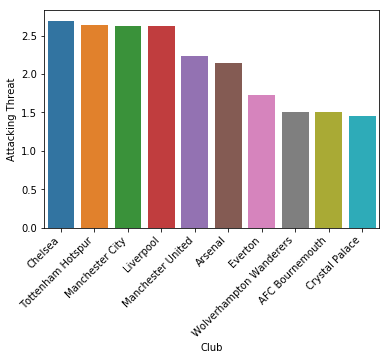

In [24]:
club_at = pd.DataFrame(df.groupby('Club').sum()['Attacking Threat'].sort_values(ascending=False).head(10))
chart = sns.barplot(x=club_at.index,y='Attacking Threat',data=club_at)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

In [25]:
df['Shots on target'] = df['Shots on target'].fillna(0)
df['Shots on target'] = df['Shots on target'].astype(int)
df['Goals'] = df['Goals'].fillna(0)
df['Goals'] = df['Goals'].astype(int)
df['Passes Per Match'] = df['Passes Per Match'].fillna(0)
df['Passes Per Match'] = df['Passes Per Match'].astype(int)


In [26]:
df[['Attacking Threat','Assists']].corr()

,Attacking Threat,Assists
Attacking Threat,1.000000,0.465589
Assists,0.465589,1.000000
